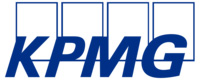

Sprocket Central Pty Ltd , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner) in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd  is keen to learn more about KPMG’s expertise in its Analytics, Information & Modelling team. 

Smith discusses KPMG’s expertise in this space (you can read more here). In particular, he speaks about how the team can effectively analyse the datasets to help Sprocket Central Pty Ltd grow its business.

Primarily, Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy. 

However, in order to support the analysis, you speak to the Associate Director for some ideas and she advised that “the importance of optimising the quality of customer datasets cannot be underestimated. The better the quality of the dataset, the better chance you will be able to use it drive company growth.”

The client provided KPMG with 3 datasets:

Customer Demographic 
Customer Addresses
Transactions data in the past 3 months
You decide to start the preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data.


Hi there,

As per voicemail, please find the 3 datasets attached from Sprocket Central Pty Ltd:

Customer Demographic 
Customer Addresses
Transaction data in the past three months
Can you please review the data quality to ensure that it is ready for our analysis in phase two. Remember to take note of any assumptions or issues we need to go back to the client on. As well as recommendations going forward to mitigate current data quality concerns.

I’ve also attached a data quality framework as a guideline. Let me know if you have any questions.

Thanks for your help.

Kind Regards
Your Manager

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Imported')

Imported


In [ ]:
Transa = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (2).xlsx', sheet_name = 'Transactions', skiprows = 1)
DemoGr = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (2).xlsx', sheet_name = 'CustomerDemographic', skiprows = 1)
CA = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (2).xlsx', sheet_name = 'CustomerAddress', skiprows = 1)

In [ ]:
print('Transactions:{}'.format(Transa.duplicated().sum()))
print('Customer Demographic:{}'.format(DemoGr.duplicated().sum()))
print('Customer Address: {}'.format(CA.duplicated().sum()))

Transactions:0
Customer Demographic:0
Customer Address: 0


In [ ]:
print('Transactions:\n{}\n'.format(Transa.isnull().sum()))
print('Customer Demographic:\n{}\n'.format(DemoGr.isnull().sum()))
print('Customer Address:\n{}\n'.format(CA.isnull().sum()))

Transactions:
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

Customer Demographic:
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                         

In [ ]:
print('Transactions:\n{}\n'.format(Transa.dtypes))
print('Customer Demographic:\n{}\n'.format(DemoGr.dtypes))
print('Customer Address:\n{}\n'.format(CA.dtypes))

Transactions:
transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

Customer Demographic:
customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category    

## Transactions dataset:

In [ ]:
Transa = Transa.sort_values(by = 'transaction_date')
df = Transa.reset_index()
df.drop('index', axis = 'columns', inplace=True)
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,517,77,311,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,40672.0
1,5877,67,138,2017-01-01,0.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0
2,3460,64,234,2017-01-01,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0
3,12485,85,2805,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0
4,19131,0,1707,2017-01-01,0.0,Approved,Trek Bicycles,Road,medium,medium,290.62,215.14,38339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,606,70,2878,2017-12-30,0.0,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,36367.0
19996,15270,3,195,2017-12-30,0.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41167.0
19997,19907,41,1721,2017-12-30,0.0,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,38693.0
19998,15757,30,3130,2017-12-30,0.0,Approved,Solex,Standard,high,medium,748.17,448.90,33552.0


In [ ]:
df = df.dropna(subset=['online_order','brand'])

In [ ]:
print('Transactions:\n{}\n'.format(df.isnull().sum()))

Transactions:
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64



In [ ]:
df['order_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [ ]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [ ]:
for i in df.columns:
  print(i,'\n', df[i].unique(), '\n')

transaction_id 
 [  517  5877  3460 ... 15270 19907 15757] 

product_id 
 [ 77  67  64  85   0  32  96  18  58  50  12  63  92  11  46  27  57  94
  62  59  38  28  17  61  36  48  74  78  43  40  71  19  24  53   4  22
  51  65   3  87   2  35  49 100  72  52  44  26  89  15   7  54  90  30
  23   1  83  66  93  86   6   9   5  60  20  13  76  81  10  21  33  95
  45  79  16  75  69  98  82  41  68  73  34  37  80  39  25   8  42  88
  29  84  56  70  14  99  91  97  31  47  55] 

customer_id 
 [ 311  138  234 ... 2417 1485 1203] 

transaction_date 
 ['2017-01-01T00:00:00.000000000' '2017-01-02T00:00:00.000000000'
 '2017-01-03T00:00:00.000000000' '2017-01-04T00:00:00.000000000'
 '2017-01-05T00:00:00.000000000' '2017-01-06T00:00:00.000000000'
 '2017-01-07T00:00:00.000000000' '2017-01-08T00:00:00.000000000'
 '2017-01-09T00:00:00.000000000' '2017-01-10T00:00:00.000000000'
 '2017-01-11T00:00:00.000000000' '2017-01-12T00:00:00.000000000'
 '2017-01-13T00:00:00.000000000' '2017-01-14T00:00:0

#### Let's Look for outliers:

In [ ]:
sns.set_theme()

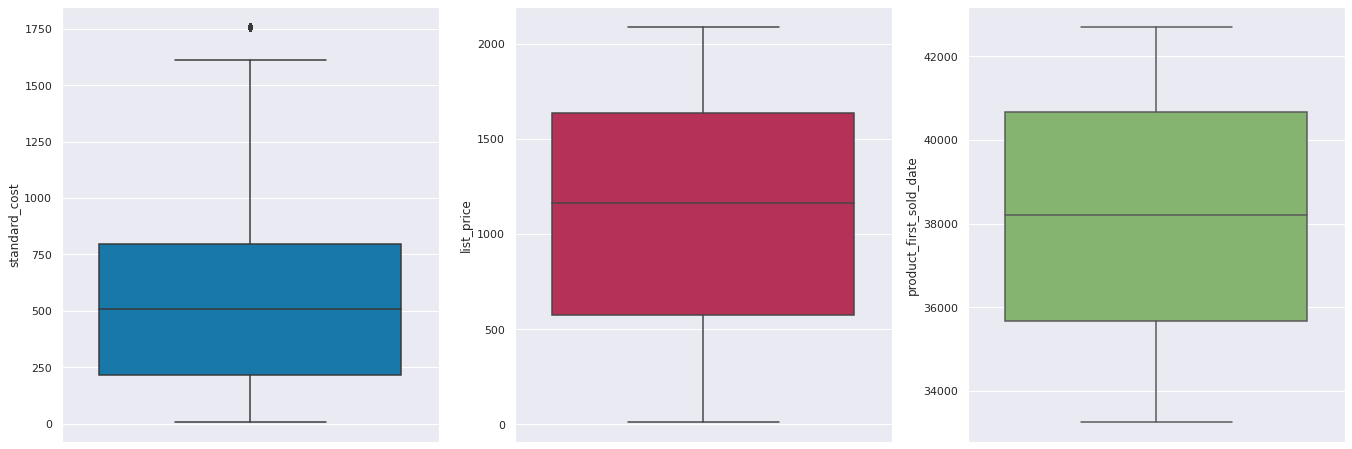

In [ ]:
plt.figure(figsize = (23,8))
plt.subplot(1,3,1)
sns.boxplot(y = df['standard_cost'], palette = 'winter')

plt.subplot(1,3,2)
sns.boxplot(y = df['list_price'], palette = 'rocket')

plt.subplot(1,3,3)
sns.boxplot(y = df['product_first_sold_date'], palette = 'summer')

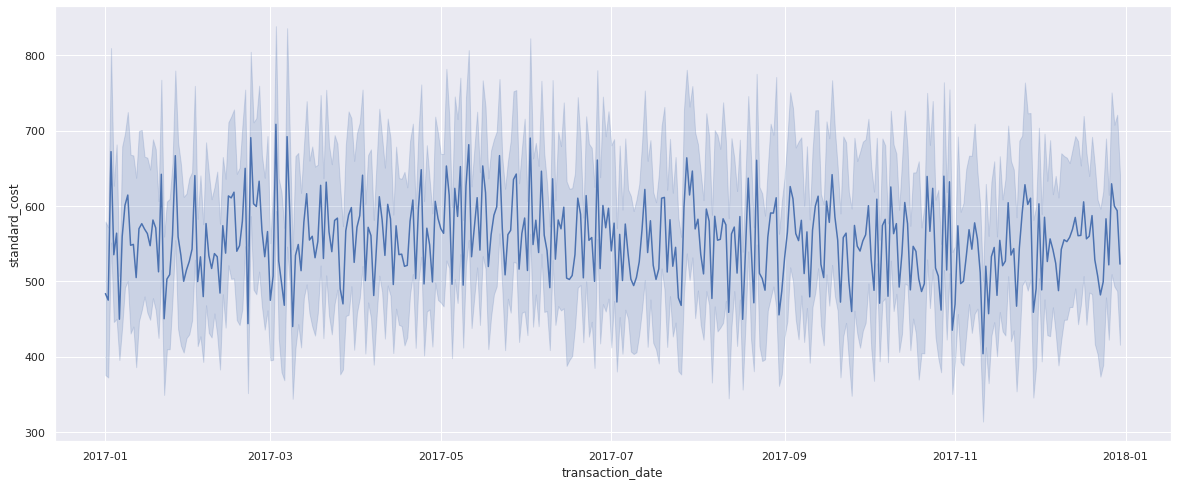

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x = 'transaction_date', y = 'standard_cost')

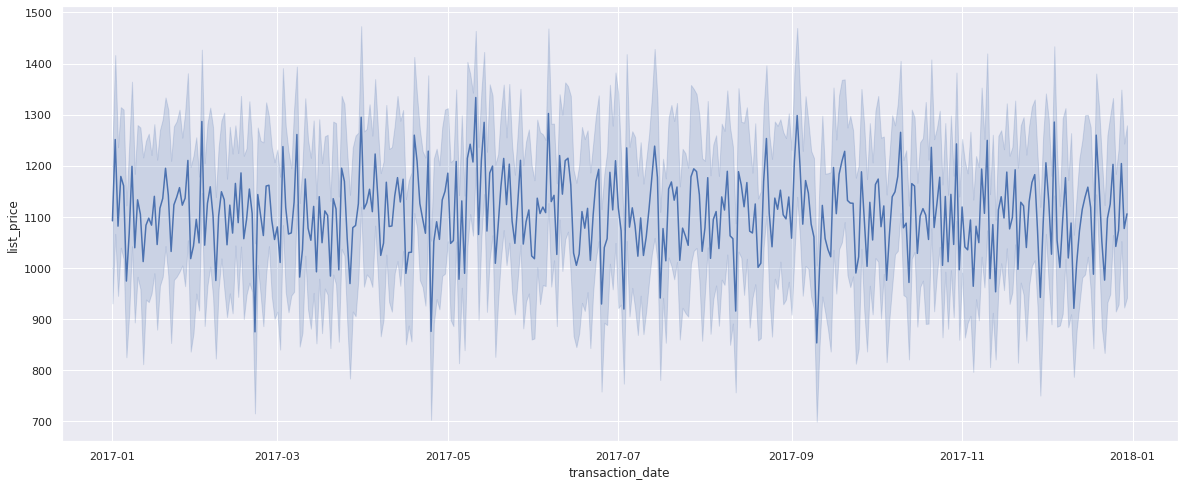

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x = 'transaction_date', y = 'list_price')

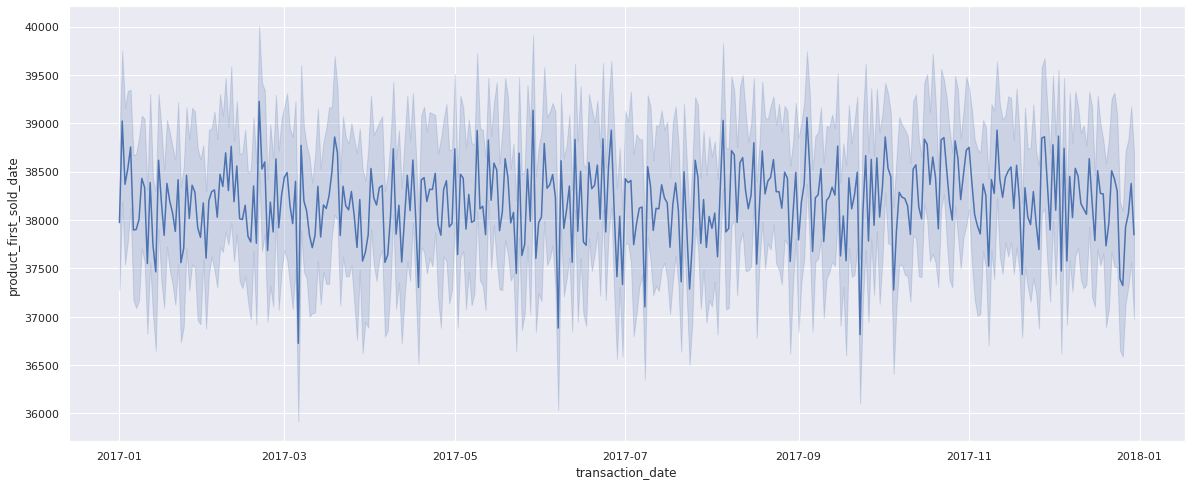

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x = 'transaction_date', y = 'product_first_sold_date')

In [ ]:
df.to_excel('transaction_1.xlsx', index=False)

## Customer Demographic Dataset

In [ ]:
DemoGr.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
DemoGr.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [ ]:
df2 = DemoGr.dropna()

In [ ]:
df2 = df2.drop('default', axis = 'columns')

In [ ]:
for i in df2.columns:
  print(i,'\n', df2[i].unique(), '\n')

customer_id 
 [   1    2    3 ... 3995 3996 3997] 

first_name 
 ['Laraine' 'Eli' 'Arlin' ... 'Stephie' 'Rusty' 'Blanch'] 

last_name 
 ['Medendorp' 'Bockman' 'Dearle' ... 'Byars' 'Iapico' 'Halgarth'] 

gender 
 ['F' 'Male' 'Female' 'Femal'] 

past_3_years_bike_related_purchases 
 [93 81 61 97 49 58 38 85 91 76 72 74 55 12 37  5 62  3 17 40 46 64 24 63
 51 68 22  2 48 44 26 47 73 21 78 30 28 20 79 11 75 41 69 98 33 67 16 80
 83 25 88 10 82 87 27 94 53 32 57 34 18  9 19  6 36  4 23 90 54 99 39  7
 42 13 45 71 56 50 14 89 84 96 59 65 70 31 60 66  0 43  1 86 95 35 92 77
  8 29 52 15] 

DOB 
 ['1953-10-12T00:00:00.000000000' '1980-12-16T00:00:00.000000000'
 '1954-01-20T00:00:00.000000000' ... '1989-04-07T00:00:00.000000000'
 '1975-12-12T00:00:00.000000000' '2001-07-13T00:00:00.000000000'] 

job_title 
 ['Executive Secretary' 'Administrative Officer' 'Recruiting Manager'
 'Business Systems Development Analyst' 'Senior Quality Engineer'
 'Nuclear Power Engineer' 'Developer I' 'Account Execut

In [ ]:
dict = {"Femal": 'F', "Female": 'F', "Male": 'M'}
df3 = df2.replace({"gender": dict})

In [ ]:
df3

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
8,9,Mala,Lind,F,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,F,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3993,Andi,Dumelow,F,6,1974-12-05,Librarian,Entertainment,Mass Customer,N,No,10.0
3993,3994,Stephie,Byars,F,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12.0
3994,3995,Rusty,Iapico,M,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0
3995,3996,Rosalia,Halgarth,F,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0


In [ ]:
df3.to_excel('Customer Demographic_1.xlsx', index = False)

## Customer Address

In [ ]:
CA

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [ ]:
for i in CA.columns:
  print(i, ':\n', CA[i].unique(), '\n')

customer_id :
 [   1    2    4 ... 4001 4002 4003] 

address :
 ['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive'] 

postcode :
 [2016 2153 4211 2448 3216 2210 2650 2023 3044 4557 3799 2760 2428 3331
 3058 2135 2233 2444 4413 4740 3218 4868 4116 2519 2756 2170 4005 4127
 2535 4726 4805 2212 2207 3350 3931 4018 4670 2480 3212 2322 3198 2047
 4503 2145 4350 2142 2029 2127 4280 2166 2046 2026 2765 2749 2745 3752
 2217 2230 3046 3183 2070 2213 4208 2774 4133 4213 4170 2073 3561 2330
 3977 2204 2086 2226 2075 2038 2069 2100 3133 3070 2777 2125 2766 2209
 2160 2065 2150 2168 4171 2155 2517 2096 2750 2093 3204 4300 3844 4226
 3192 2485 2097 4817 2516 3074 4508 4405 2452 2205 4132 4744 2158 3201
 4178 2112 2033 4401 3186 4017 2315 2285 2219 4509 2759 2747 2227 2025
 3191 3025 2263 2154 2119 3016 4113 2032 4352 3020 2116 3057 2099 3749
 2148 3145 2021 2333 2783 2280 4120 3638 2074 2880 2430 4560 2088 2220
 3031 22

In [ ]:
dict = {'New South Wales':'NSW','Victoria':'VIC'}
df4 = CA.replace({"state": dict})

In [ ]:
df4

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [ ]:
df4.to_excel('CustomerAddress_1.xlsx', index = False)

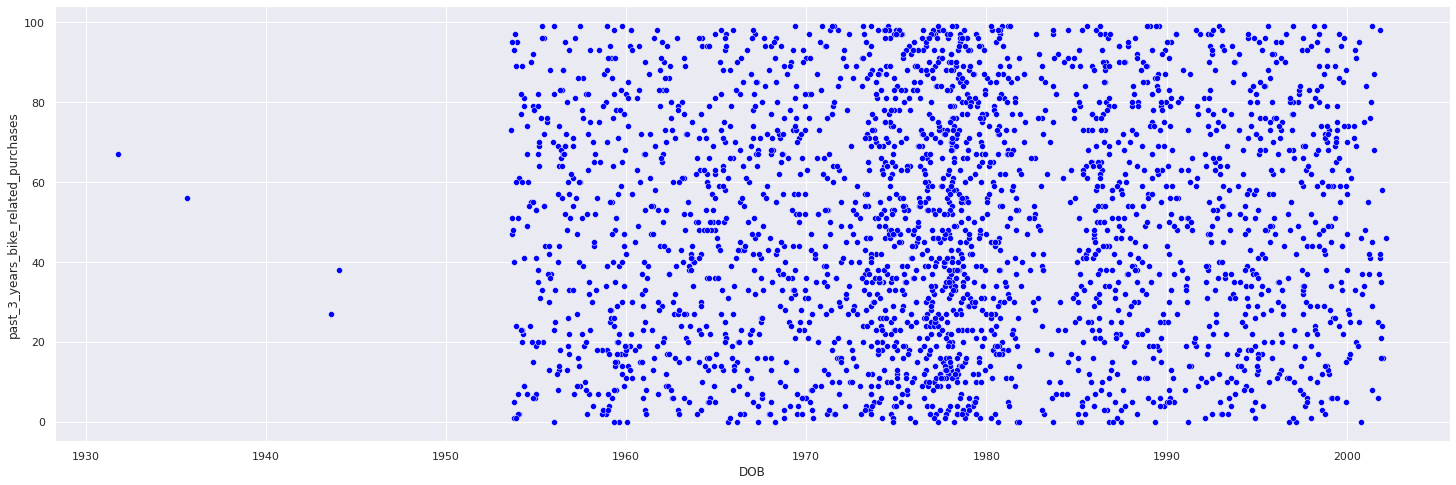

In [ ]:
 plt.figure(figsize=(25,8))
 sns.scatterplot(x = df3['DOB'], y = df3['past_3_years_bike_related_purchases'], color = 'blue' )

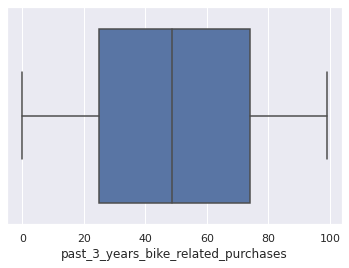

In [ ]:
 sns.boxplot(x = df3['past_3_years_bike_related_purchases'])

## "Thank You"